
#Proje Hosh Mohasebati


## **What is Sentiment Analysis:**

![Sentiment Analysis from Dictionary](https://cdn-images-1.medium.com/max/2000/1*Up6sMLbRg79TlRP2rP1tsw.png)

I think this result from google dictionary gives a very succinct definition. So, here we will build a classifier on [IMDB movie dataset](http://ai.stanford.edu/~amaas/data/sentiment/) using a Deep Learning technique called RNN.

I’m outlining a step-by-step process for how Recurrent Neural Networks (RNN) can be implemented using Long Short Term Memory (LSTM) architecture:

 1. Load in and visualize the data

 2. Data Processing — convert to lower case

 3. Data Processing — Remove punctuation

 4. Data Processing — Create list of reviews

 5. Tokenize — Create Vocab to Int mapping dictionary

 6. Tokenize — Encode the words

 7. Tokenize — Encode the labels

 8. Analyze Reviews Length

 9. Removing Outliers — Getting rid of extremely long or short reviews

 10. Padding / Truncating the remaining data

 11. Training, Validation, Test Dataset Split

 12. Dataloaders and Batching

 13. Define the LSTM Network Architecture

 14. Define the Model Class

 15. Training the Network

 16. Testing (on Test data and User- generated data)
 
##  ***1) Load in and visualize the data***

We are using [IMDB movies review dataset](http://ai.stanford.edu/~amaas/data/sentiment/). If it is stored in your machine in a txt file then we just load it in

In [ ]:
# Download Data
!wget http://www.data-science-blog.com/download/sarthak_babbar/reviews.txt
!wget http://www.data-science-blog.com/download/sarthak_babbar/labels.txt

--2020-07-09 18:06:21--  http://www.data-science-blog.com/download/sarthak_babbar/reviews.txt
Resolving www.data-science-blog.com (www.data-science-blog.com)... 85.25.214.207
Connecting to www.data-science-blog.com (www.data-science-blog.com)|85.25.214.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33678267 (32M) [text/plain]
Saving to: ‘reviews.txt’

reviews.txt         100%[===================>]  32.12M  15.9MB/s    in 2.0s    

2020-07-09 18:06:23 (15.9 MB/s) - ‘reviews.txt’ saved [33678267/33678267]

--2020-07-09 18:06:24--  http://www.data-science-blog.com/download/sarthak_babbar/labels.txt
Resolving www.data-science-blog.com (www.data-science-blog.com)... 85.25.214.207
Connecting to www.data-science-blog.com (www.data-science-blog.com)|85.25.214.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225000 (220K) [text/plain]
Saving to: ‘labels.txt’

labels.txt          100%[===================>] 219.73K   496KB/s    in 0.4s    

In [ ]:
# read data from text files
with open('reviews.txt', 'r') as f:
  reviews = f.read()
with open('labels.txt', 'r') as f:
  labels = f.read()
print('Number of character :', len(reviews))
print(reviews[:100])
print()
print(labels[:25])


Number of character : 33678267
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life

positive
negative
positiv


## ***2) Data Processing — convert to lower case***

In [ ]:
reviews = reviews.lower()

## ***3) Data Processing — remove punctuation***

In [ ]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


We saw all the punctuation symbols predefined in python. To get rid of all these punctuation we will simply use

##  ***4) Data Processing — create list of reviews***

We have got all the strings in one huge string. Now we will separate out individual reviews and store them as individual list elements. Like, [review_1, review_2, review_3……. review_n]

In [ ]:
all_text = ''.join([ch for ch in reviews if ch not in punctuation])
reviews_split = all_text.split('\n')
print ('Number of reviews :', len(reviews_split))
labels_split = labels.split('\n')
print ('Number of labels :', len(labels_split))

Number of reviews : 25001
Number of labels : 25001


##  ***5) Tokenize — Create Vocab to Int mapping dictionary***

In most of the NLP tasks, you will create an index mapping dictionary in such a way that your frequently occurring words are assigned lower indexes. One of the most common way of doing this is to use Counter method from Collections library.

In [ ]:
from collections import Counter
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)
sorted_words = count_words.most_common()
print (sorted_words)

[('the', 336713), ('and', 164107), ('a', 163009), ('of', 145864), ('to', 135720), ('is', 107328), ('br', 101872), ('it', 96352), ('in', 93968), ('i', 87623), ('this', 76000), ('that', 73245), ('s', 65361), ('was', 48208), ('as', 46933), ('for', 44343), ('with', 44125), ('movie', 44039), ('but', 42603), ('film', 40155), ('you', 34230), ('on', 34200), ('t', 34081), ('not', 30626), ('he', 30138), ('are', 29430), ('his', 29374), ('have', 27731), ('be', 26957), ('one', 26789), ('all', 23978), ('at', 23513), ('they', 22906), ('by', 22546), ('an', 21560), ('who', 21433), ('so', 20617), ('from', 20498), ('like', 20276), ('there', 18832), ('her', 18421), ('or', 18004), ('just', 17771), ('about', 17374), ('out', 17113), ('if', 16803), ('has', 16790), ('what', 16159), ('some', 15747), ('good', 15143), ('can', 14654), ('more', 14251), ('she', 14223), ('when', 14182), ('very', 14069), ('up', 13291), ('time', 12724), ('no', 12717), ('even', 12651), ('my', 12503), ('would', 12436), ('which', 12047), 

In order to create a vocab to int mapping dictionary, you would simply do this

In [ ]:
vocab_to_int = {w:i+1 for i, (w,cnt) in enumerate(sorted_words)}
print (vocab_to_int)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'it': 8, 'in': 9, 'i': 10, 'this': 11, 'that': 12, 's': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'you': 21, 'on': 22, 't': 23, 'not': 24, 'he': 25, 'are': 26, 'his': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'they': 33, 'by': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'there': 40, 'her': 41, 'or': 42, 'just': 43, 'about': 44, 'out': 45, 'if': 46, 'has': 47, 'what': 48, 'some': 49, 'good': 50, 'can': 51, 'more': 52, 'she': 53, 'when': 54, 'very': 55, 'up': 56, 'time': 57, 'no': 58, 'even': 59, 'my': 60, 'would': 61, 'which': 62, 'story': 63, 'only': 64, 'really': 65, 'see': 66, 'their': 67, 'had': 68, 'we': 69, 'were': 70, 'me': 71, 'well': 72, 'than': 73, 'much': 74, 'get': 75, 'bad': 76, 'been': 77, 'people': 78, 'will': 79, 'do': 80, 'other': 81, 'also': 82, 'into': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'don': 89, 'mo

##  ***6) Tokenize — Encode the words***

So far we have created a) list of reviews and b) index mapping dictionary using vocab from all our reviews. All this was to create an encoding of reviews (replace words in our reviews by integers)

In [ ]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23], [63, 4, 3, 125, 36, 47, 7472, 1395, 16, 3, 4181, 505, 45, 17, 3, 622, 134, 12, 6, 3, 1279, 457, 4, 1721, 207, 3, 10624, 7373, 300, 6, 667, 83, 35, 2116, 1086, 2989, 34, 1, 898, 46417, 4, 8, 13, 5096, 464, 8, 2656, 1721, 1, 221, 57, 17, 58, 794, 1297, 832, 228, 8, 43, 98, 123, 1469, 59, 147, 38, 1, 963, 142, 29, 667, 123, 1, 13584, 410, 61, 94, 177

Note: what we have created now is a list of lists. Each individual review is a list of integer values and all of them are stored in one huge list
##  ***7) Tokenize — Encode the labels***

This is simple because we only have 2 output labels. So, we will just label ‘positive’ as 1 and ‘negative’ as 0

In [ ]:
import numpy as np
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)
print (encoded_labels[0:10])

[1 0 1 0 1 0 1 0 1 0]


##  ***8) Analyze Reviews Length***

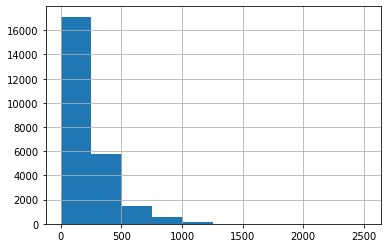

count    25001.000000
mean       240.798208
std        179.020628
min          0.000000
25%        130.000000
50%        179.000000
75%        293.000000
max       2514.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
reviews_len = [len(review) for review in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()


**Observations**: a) Mean review length = 240 b) Some reviews are of 0 length. Keeping this review won’t make any sense for our analysis c) Most of the reviews less than 500 words or more d) There are quite a few reviews that are extremely long, we can manually investigate them to check whether we need to include or exclude them from our analysis
## ***9) Removing Outliers — Getting rid of extremely long or short reviews***

In [ ]:
reviews_int = [ reviews_int[i] for i, length in enumerate(reviews_len) if length > 0 ]
encoded_labels = [ encoded_labels[i] for i, length in enumerate(reviews_len) if length > 0 ]

##  ***10) Padding / Truncating the remaining data***

To deal with both short and long reviews, we will pad or truncate all our reviews to a specific length. We define this length by **Sequence Length. **This sequence length is same as number of time steps for LSTM layer.

For reviews shorter than seq_length, we will pad with 0s. For reviews longer than seq_length we will truncate them to the first seq_length words.

Note: We are creating/maintaining a 2D array structure as we created for reviews_int . Output will look like this

In [ ]:
def pad_features(reviews_int, seq_length):
    # Return features of review_ints, where each review is padded with 0's
    # or truncated to the input seq_length.
    features = np.zeros((len(reviews_int), seq_length), dtype=int)
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        else:
            new = review[0:seq_length]
        features[i, :] = np.array(new)
    return features

In [ ]:
seq_length = 200
features = pad_features(reviews_int, seq_length)
print (features[:10, :])

[[    0     0     0 ...     8   215    23]
 [    0     0     0 ...    29   108  3324]
 [22382    42 46418 ...   483    17     3]
 ...
 [    0     0     0 ...     6    72  3148]
 [    0     0     0 ...    67   521    72]
 [   54    10    14 ...  2467    16   100]]


##  ***11) Training, Validation, Test Dataset Split***

Once we have got our data in nice shape, we will split it into training, validation and test sets

**train= 80% | valid = 10% | test = 10%**

In [ ]:
split_frac = 0.8
l = len(features)
train_x = features[0:int(split_frac*l)]
train_y = encoded_labels[0:int(split_frac*l)]
rem_x = features[int(split_frac*l):]
rem_y = encoded_labels[int(split_frac*l):]
valid_x = rem_x[0:int(len(rem_x)*0.5)]
valid_y = rem_y[0:int(len(rem_y)*0.5)]
test_x = rem_x[int(len(rem_x)*0.5):]
test_y = rem_y[int(len(rem_y)*0.5):]


##  ***12) Dataloaders and Batching***

After creating our training, test and validation data. Next step is to create dataloaders for this data. We can use generator function for batching our data into batches instead we will use a TensorDataset. This is one of a very useful utility in PyTorch for using our data with DataLoaders with exact same ease as of torchvision datasets

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.as_tensor(train_x), torch.as_tensor(train_y))
valid_data = TensorDataset(torch.as_tensor(valid_x), torch.as_tensor(valid_y))
test_data = TensorDataset(torch.as_tensor(test_x), torch.as_tensor(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

##  ***13) Define the LSTM Network Architecture***



The layers are as follows:

0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)

 1. Embedding Layer: that converts our word tokens (integers) into embedding of specific size

 2. LSTM Layer: defined by hidden state dims and number of layers

 3. Fully Connected Layer: that maps output of LSTM layer to a desired output size

 4. Sigmoid Activation Layer: that turns all output values in a value between 0 and 1

 5. Output: Sigmoid output from the last timestep is considered as the final output of this network
 
##  ***14) Define the Model Class***

In [ ]:
import torch.nn as nn


class SentimentLSTM(nn.Module):

    # The RNN model that will be used to perform Sentiment analysis.
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):

        # Initialize the model by setting up the layers.
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        # Perform a forward pass of our model on some input and hidden state.
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        return hidden

##  ***15) Training the Network***

* Instantiate the network

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Training Loop

Most of the code in training loop is pretty standard Deep Learning training code that you might see often in all the implementations that’s using PyTorch framework.

In [ ]:
# loss and optimization functions
lr = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
# training params
epochs = 4  # 3-4 is approx where We noticed the validation loss stop decreasing
counter = 0
print_every = 100
clip = 5  # gradient clipping
# Enable GPU
train_on_gpu = True
if train_on_gpu:
    net.cuda()
net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    hid = net.init_hidden(batch_size)
    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        hid = tuple([each.data for each in hid])
        # zero accumulated gradients
        net.zero_grad()
        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        output, hid = net(inputs, hid)
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_hid = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_hid = tuple([each.data for each in val_hid])
                inputs = inputs.type(torch.LongTensor)
                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()
                output, val_hid = net(inputs, val_hid)
                val_loss = criterion(output.squeeze(), labels.float())
                val_losses.append(val_loss.item())
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.681362... Val Loss: 0.681802
Epoch: 1/4... Step: 200... Loss: 0.590442... Val Loss: 0.626713
Epoch: 1/4... Step: 300... Loss: 0.497369... Val Loss: 0.599522
Epoch: 1/4... Step: 400... Loss: 0.639288... Val Loss: 0.555558
Epoch: 2/4... Step: 500... Loss: 0.515638... Val Loss: 0.640282
Epoch: 2/4... Step: 600... Loss: 0.566262... Val Loss: 0.504294
Epoch: 2/4... Step: 700... Loss: 0.337355... Val Loss: 0.567543
Epoch: 2/4... Step: 800... Loss: 0.466928... Val Loss: 0.507565
Epoch: 3/4... Step: 900... Loss: 0.429062... Val Loss: 0.501180
Epoch: 3/4... Step: 1000... Loss: 0.448351... Val Loss: 0.454720
Epoch: 3/4... Step: 1100... Loss: 0.242899... Val Loss: 0.448283
Epoch: 3/4... Step: 1200... Loss: 0.268576... Val Loss: 0.425184
Epoch: 4/4... Step: 1300... Loss: 0.206314... Val Loss: 0.474759
Epoch: 4/4... Step: 1400... Loss: 0.148741... Val Loss: 0.463619
Epoch: 4/4... Step: 1500... Loss: 0.179233... Val Loss: 0.494124
Epoch: 4/4... Step: 1600... Loss: 

## 16) Testing

* On Test Data

In [ ]:
# Get test data loss and accuracy
test_losses = []  # track loss
num_correct = 0
# init hidden state
hid = net.init_hidden(batch_size)
net.eval()
# iterate over test data
for inputs, labels in test_loader:
    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    hid = tuple([each.data for each in hid])
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    if (train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    output, hid = net(inputs, hid)
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))
# accuracy over all test data
test_acc = num_correct / len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.514
Test accuracy: 0.805


### On User-generated Data

First, we will define a tokenize function that will take care of pre-processing steps and then we will create a predict function that will give us the final output after parsing the user provided review.

In [ ]:
def tokenize_review(test_review):
    test_review = test_review.lower()  # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])
    # splitting by spaces
    test_words = test_text.split()
    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])
    return test_ints


def predict(net, test_review, sequence_length=200):
    net.eval()
    # tokenize review
    test_ints = tokenize_review(test_review)
    # pad tokenized sequence
    seq_length = sequence_length
    features = pad_features(test_ints, seq_length)
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    batch_size = feature_tensor.size(0)
    # initialize hidden state
    hid = net.init_hidden(batch_size)
    if (train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    # get the output from the model
    output, hid = net(feature_tensor, hid)
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    # print custom response
    if (pred.item() == 1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

### **Results:**

In [ ]:
test_review = 'This movie had the best acting and the dialogue was so good. I loved it.'
seq_length=200 # good to use the length that was trained on
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.949163
Positive review detected!
